### Libraries import and seed initialization

We import the required libraries and load the MNIST dataset. Specifically, we import numpy for numerical operations, tensorflow to build and train the neural network model, and sklearn to calculate various evaluation metrics.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

### Load Data

We then load the MNIST dataset using the tensorflow.keras.datasets module, which provides a convenient way to load and preprocess the dataset. We split the dataset into training and testing sets, with 60,000 images in the training set and 10,000 images in the testing set.

In [3]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f'Training data shape: {x_train.shape}, labels shape: {y_train.shape}')
print(f'Testing data shape: {x_test.shape}, labels shape: {y_test.shape}')

Training data shape: (60000, 28, 28), labels shape: (60000,)
Testing data shape: (10000, 28, 28), labels shape: (10000,)


### Visualize Data

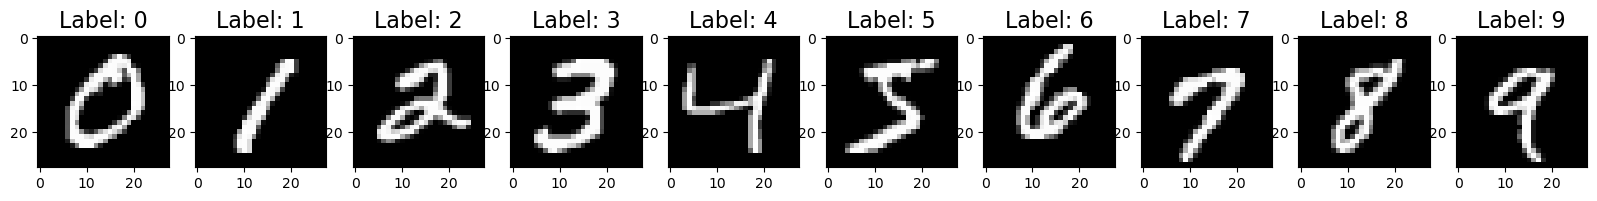

In [4]:
num_classes = 10
fig, ax = plt.subplots(1, num_classes, figsize=(20, 20))

for i in range(num_classes):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title(f'Label: {i}', fontsize=16)

### Preprocess Data

We preprocess the data. We normalize the pixel values of the images to be between 0 and 1 by dividing each pixel value by 255. We also one-hot encode the labels using the tensorflow.keras.utils.to_categorical() function.

In [5]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

print(f'Training data shape after preprocessing: {x_train.shape}')

Training data shape after preprocessing: (60000, 784)


### Define and compile Data

We define the architecture of our neural network model. We use a sequential model with three layers - one input layer with 784 neurons (one for each pixel), one hidden layer with 128 neurons and the ReLU activation function, and one output layer with 10 neurons (one for each digit) and the softmax activation function. We compile the model with the categorical crossentropy loss function, the Adam optimizer, and the accuracy metric.

In [6]:
model = Sequential([
    Dense(units=128, input_shape=(784,), activation='relu'),
    Dense(units=128, activation='relu'),
    Dropout(0.25),
    Dense(units=10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


### Train Model

We train the model on the training set using the fit() method. We set the batch size to 128 and the number of epochs to 10. We also pass in the testing set as the validation data to monitor the model's performance on the testing set during training

In [9]:
batch_size = 256
epochs = 15
h = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/15
235/235 [==============================] - 2s 3ms/step - loss: 0.4553 - accuracy: 0.8687
Epoch 2/15
235/235 [==============================] - 1s 3ms/step - loss: 0.1768 - accuracy: 0.9485
Epoch 3/15
235/235 [==============================] - 1s 3ms/step - loss: 0.1238 - accuracy: 0.9630
Epoch 4/15
235/235 [==============================] - 1s 3ms/step - loss: 0.0969 - accuracy: 0.9709
Epoch 5/15
235/235 [==============================] - 1s 3ms/step - loss: 0.0778 - accuracy: 0.9768
Epoch 6/15
235/235 [==============================] - 1s 3ms/step - loss: 0.0652 - accuracy: 0.9800
Epoch 7/15
235/235 [==============================] - 1s 3ms/step - loss: 0.0546 - accuracy: 0.9839
Epoch 8/15
235/235 [==============================] - 1s 3ms/step - loss: 0.0476 - accuracy: 0.9852
Epoch 9/15
235/235 [==============================] - 1s 3ms/step - loss: 0.0409 - accuracy: 0.9872
Epoch 10/15
235/235 [==============================] - 1s 3ms/step - loss: 0.0352 - accuracy: 0.9891

### Evaluate Model

We evaluate the model's performance on the testing set using the evaluate() method. We print out the test accuracy.

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')

313/313 [==============================] - 0s 1ms/step - loss: 0.0747 - accuracy: 0.9802
Test loss: 0.07472734153270721, Test accuracy: 0.9801999926567078


### Predict and show a sample image

We make predictions on the testing set using the predict() method. We then convert the predicted probabilities to predicted classes by taking the argmax of each row of probabilities

1/1 [==============================] - 0s 63ms/step


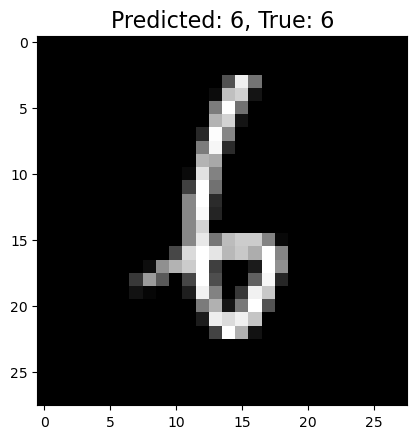

In [11]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = np.argmax(model.predict(x_sample.reshape(1, -1)), axis=1)[0]

plt.title(f'Predicted: {y_sample_pred_class}, True: {y_sample_true}', fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

### Visualize a confusion matrix 

313/313 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'Confusion Matrix')

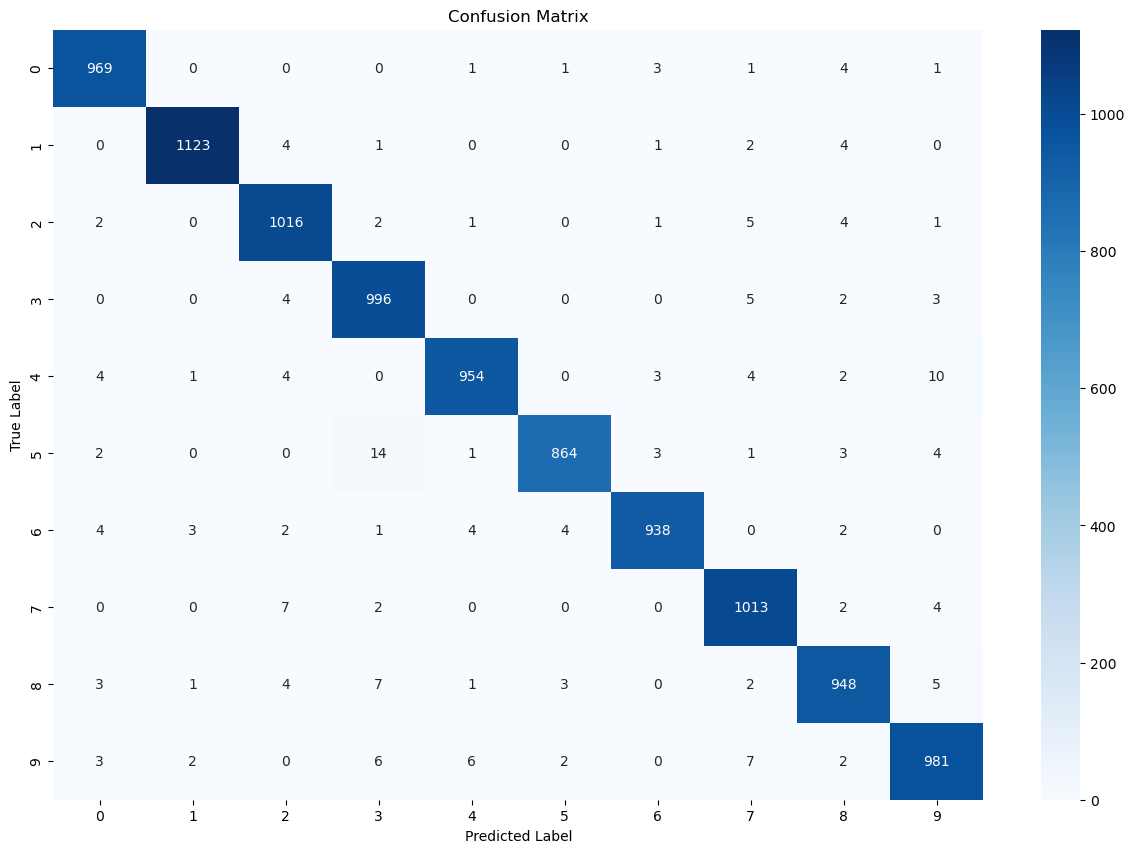

In [12]:
y_pred_classes = np.argmax(model.predict(x_test), axis=1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap='Blues')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

### Find top prediction errors

We first predicted the classes for the test set using the trained model. Then, we compared the predicted classes with the true classes to identify the misclassified instances. We then used these misclassified instances to make predictions using the model again to get the predicted probabilities for each class.

Next, we stored the predicted classes, predicted probabilities, true classes, and the corresponding test images for the misclassified instances in separate arrays. We then sorted the misclassified instances by their prediction error probabilities and selected the top n instances with the highest prediction errors.

Finally, we displayed the selected top n misclassified instances along with their true classes, predicted classes, and the prediction error probabilities to gain insights into which classes the model is struggling to predict accurately.

7/7 [==============================] - 0s 4ms/step


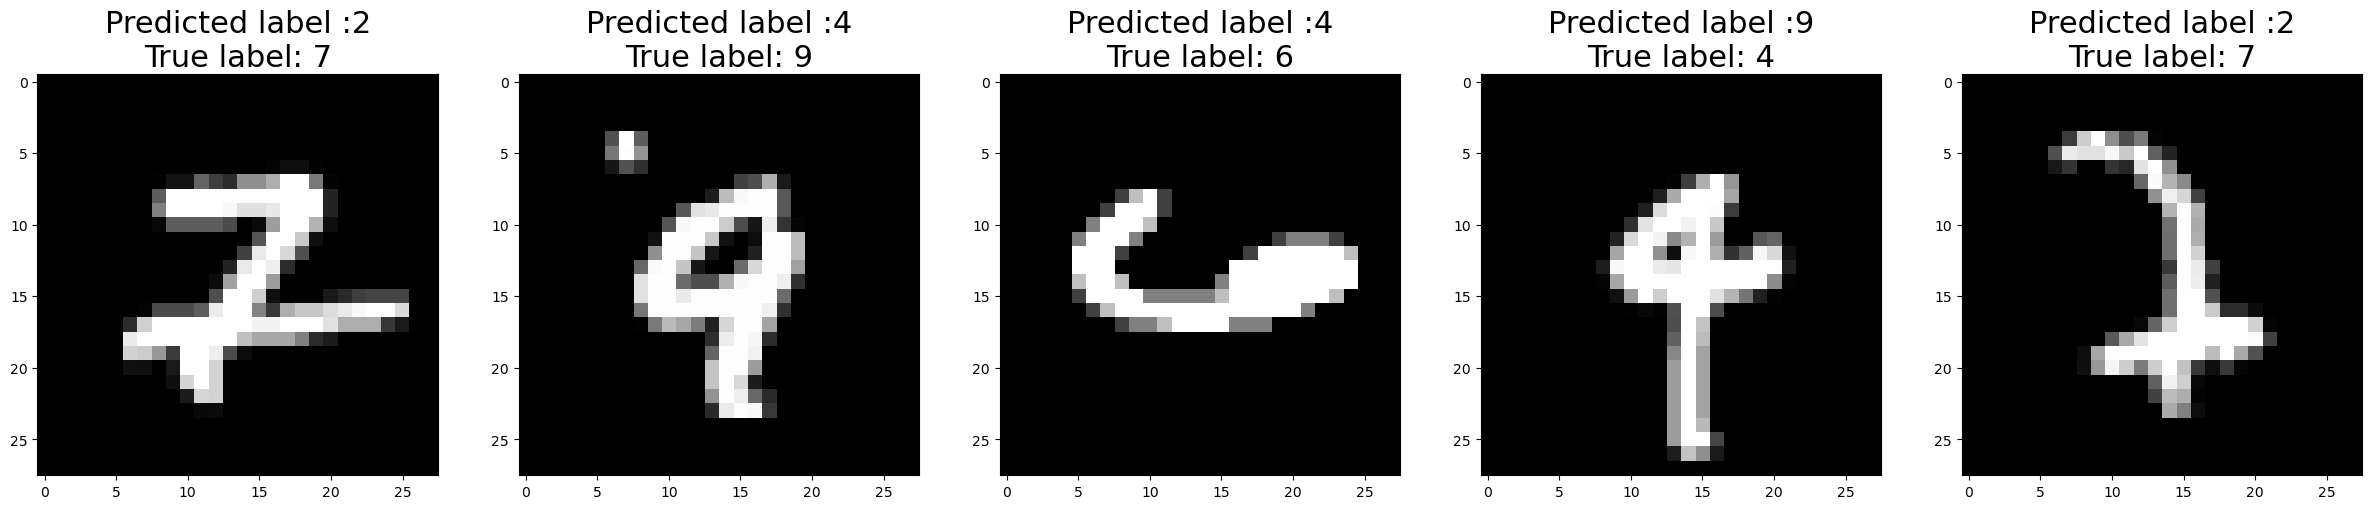

In [13]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = model.predict(x_test[errors])
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
    idx = top_idx_diff_errors[i]
    sample = x_test_errors[idx].reshape(28,28)
    y_t = y_true_errors[idx]
    y_p = y_pred_classes_errors[idx]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)


### Classification Report

We calculate various evaluation metrics to assess the model's performance. We use the confusion_matrix(), classification_report(), and accuracy_score() functions from sklearn.metrics to calculate the confusion matrix, classification report, and accuracy score, respectively. We also calculate the precision, recall, and F1-score for each class using the precision_score(), recall_score(), and f1_score() functions with the average=None parameter.

In [14]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = model.predict(x_test)

# Convert the predicted and true labels from one-hot encoded to integers
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate accuracy score
acc = accuracy_score(y_true_classes, y_pred_classes)

# Calculate classification report
report = classification_report(y_true_classes, y_pred_classes)

print(f"Accuracy: {acc}")
print(f"Classification Report:\n{report}")


313/313 [==============================] - 0s 963us/step
Accuracy: 0.9802
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### Overall Results

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Overall Model Results are:")
# Accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Precision
precision = precision_score(y_true, y_pred_classes, average='weighted')
print("Precision: {:.2f}%".format(precision * 100))

# Recall
recall = recall_score(y_true, y_pred_classes, average='weighted')
print("Recall: {:.2f}%".format(recall * 100))

# F1 Score
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print("F1 Score: {:.2f}%".format(f1 * 100))


313/313 [==============================] - 0s 1ms/step
Overall Model Results are:
Accuracy: 98.02%
Precision: 98.03%
Recall: 98.02%
F1 Score: 98.02%


### Visualisation of Learning Parameters 

Text(0.5, 1.0, 'Accuracy (.x) vs Epochs')

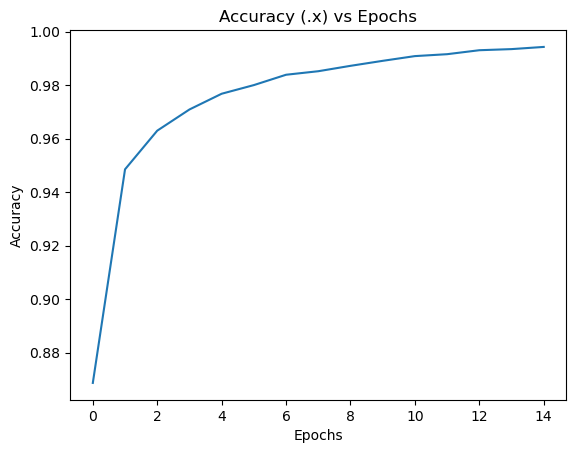

In [16]:
plt.plot(h.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy (.x) vs Epochs")

Text(0.5, 1.0, 'Loss vs Epochs')

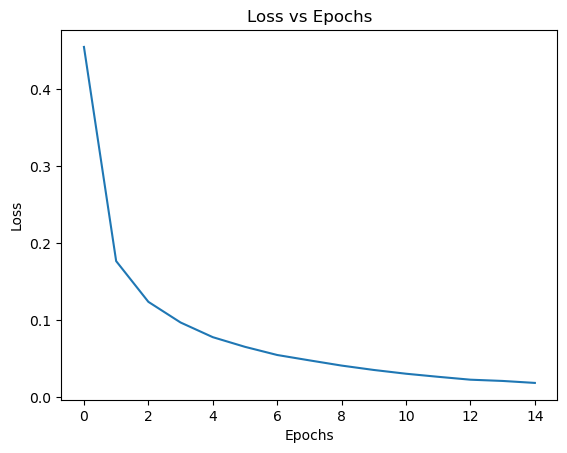

In [18]:
plt.plot(h.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")